# Project - 5 : Unsupervised Learning

Project Describtion
----------------------------
The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Problem Statement
----------------------------

The points distribution for this case is as follows:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

Resources Avaliable: https://archive.ics.uci.edu/ml/datasets/Statlog+(Vehicle+Silhouettes)


Loading the Dataset
----

In [238]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [239]:
vehicle_df = pd.read_csv('vehicle.csv')

In [240]:
vehicle_df.shape

(846, 19)

# 1. Data pre-processing

Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [241]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [242]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [243]:
vehicle_df.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Validating Missing values
--

In [245]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

MIssing values are less than 1% of the data so we will be removing for our analysis

In [246]:
vehicle_df = vehicle_df.dropna(axis = 0, how = 'any')


In [247]:
print(vehicle_df.shape)
print('*'*40)
print(vehicle_df.isnull().sum())


(813, 19)
****************************************
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


In [248]:
vehicle_df.describe().transpose()

count        mean         std    min    25%  \
compactness                  813.0   93.656827    8.233751   73.0   87.0   
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.615402  104.0  141.0   
pr.axis_aspect_ratio         813.0   61.774908    7.973000   47.0   57.0   
max.length_aspect_ratio      813.0    8.599016    4.677174    2.0    7.0   
scatter_ratio                813.0  168.563346   33.082186  112.0  146.0   
elongatedness                813.0   40.988930    7.803380   26.0   33.0   
pr.axis_rectangularity       813.0   20.558426    2.573184   17.0   19.0   
max.length_rectangularity    813.0  147.891759   14.504648  118.0  137.0   
scaled_variance              813.0  188.377614   31.165873  130.0  167.0   
scaled_variance.1            813.0  438.382534  175.270368  184.0  318.0   
scaled_radius_of_gyration    813.0  174.252153   32.332161  109.0  149.0   
scaled_radius_of_gyration.1  813.0   72.399754    7.475994   59.0   67.0   
skewness_about               813.0    6.351784    4.921476    0.0    2.0   
skewness_about.1             813.0   12.687577    8.926951    0.0    6.0   
skewness_about.2             813.0  188.979090    6.153681  176.0  184.0   
hollows_ratio                813.0  195.729397    7.398781  181.0  191.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          79.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  586.0  1018.0  
scaled_radius_of_gyration    173.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [249]:
pd.value_counts(vehicle_df['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

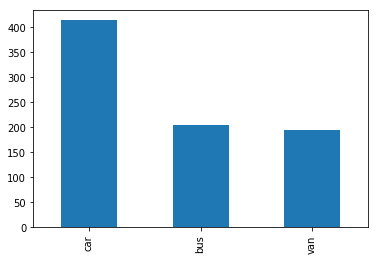

In [250]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(vehicle_df["class"]).plot(kind="bar")

Outliers treatment
---

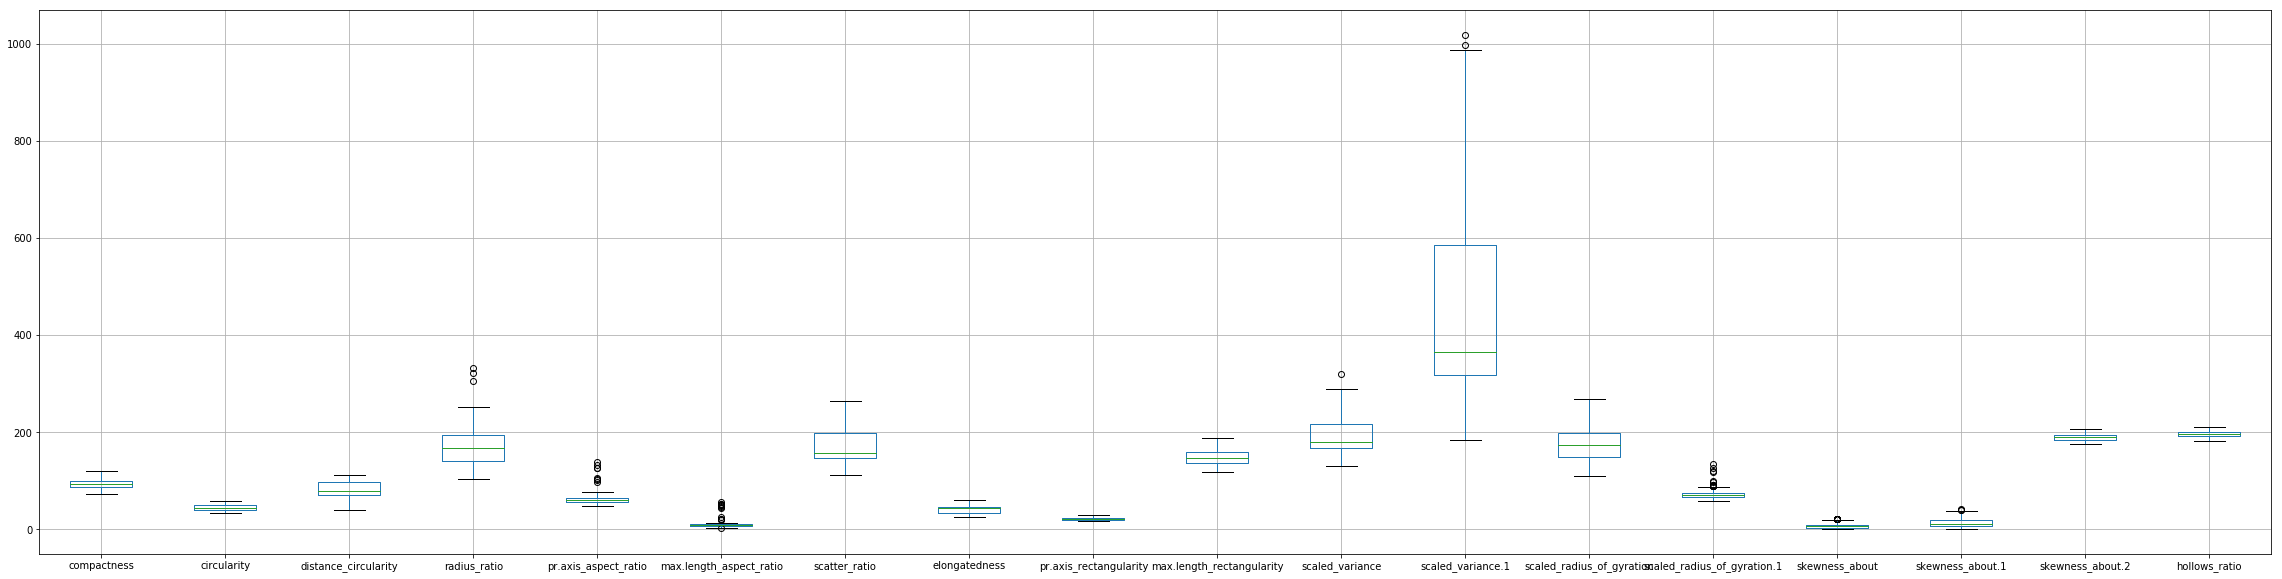

In [251]:
vehicle_df.boxplot(figsize=(40,10))

In [252]:
# Checking for outliers in the continuous variables
num_vehicle_df = vehicle_df[['radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio','scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']]

# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_vehicle_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

radius_ratio  pr.axis_aspect_ratio  max.length_aspect_ratio  \
count    813.000000            813.000000               813.000000   
mean     169.098401             61.774908                 8.599016   
std       33.615402              7.973000                 4.677174   
min      104.000000             47.000000                 2.000000   
25%      141.000000             57.000000                 7.000000   
50%      167.000000             61.000000                 8.000000   
75%      195.000000             65.000000                10.000000   
90%      211.800000             69.000000                11.000000   
95%      222.000000             71.000000                12.000000   
99%      234.880000             75.880000                24.640000   
max      333.000000            138.000000                55.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration.1  \
count       813.000000         813.000000                   813.000000   
mean        188.377614         438.382534                    72.399754   
std          31.165873         175.270368                     7.475994   
min         130.000000         184.000000                    59.000000   
25%         167.000000         318.000000                    67.000000   
50%         179.000000         364.000000                    71.000000   
75%         217.000000         586.000000                    75.000000   
90%         228.000000         703.000000                    82.000000   
95%         234.000000         726.400000                    85.000000   
99%         275.000000         927.400000                    89.880000   
max         320.000000        1018.000000                   135.000000   

       skewness_about  skewness_about.1  
count      813.000000        813.000000  
mean         6.351784         12.687577  
std          4.921476          8.926951  
min          0.000000          0.000000  
25%          2.000000          6.000000  
50%          6.000000         11.000000  
75%          9.000000         19.000000  
90%         13.000000         25.000000  
95%         16.000000         29.000000  
99%         20.880000         36.000000  
max         22.000000         41.000000

In [253]:
# Clubbing levels based on the percentiles
vehicle_df['radius_ratio'] = np.where(vehicle_df['radius_ratio'] >234.880000, 234.880000, vehicle_df['radius_ratio'])
vehicle_df['pr.axis_aspect_ratio'] = np.where(vehicle_df['pr.axis_aspect_ratio'] >75.880000, 75.880000, vehicle_df['pr.axis_aspect_ratio'])
vehicle_df['max.length_aspect_ratio'] = np.where(vehicle_df['max.length_aspect_ratio'] >12.000000, 12.000000, vehicle_df['max.length_aspect_ratio'])
vehicle_df['max.length_aspect_ratio'] = np.where(vehicle_df['max.length_aspect_ratio'] <7.000000, 7.000000, vehicle_df['max.length_aspect_ratio'])

vehicle_df['scaled_variance'] = np.where(vehicle_df['scaled_variance'] >234.000000, 234.000000, vehicle_df['scaled_variance'])
vehicle_df['scaled_variance.1'] = np.where(vehicle_df['scaled_variance.1'] >726.400000, 726.400000, vehicle_df['scaled_variance.1'])
vehicle_df['scaled_radius_of_gyration.1'] = np.where(vehicle_df['scaled_radius_of_gyration.1'] >85.000000, 85.000000, vehicle_df['scaled_radius_of_gyration.1'])
vehicle_df['skewness_about'] = np.where(vehicle_df['skewness_about'] >16.000000, 16.000000, vehicle_df['skewness_about'])
vehicle_df['skewness_about.1'] = np.where(vehicle_df['skewness_about.1'] >29.000000, 29.000000, vehicle_df['skewness_about.1'])

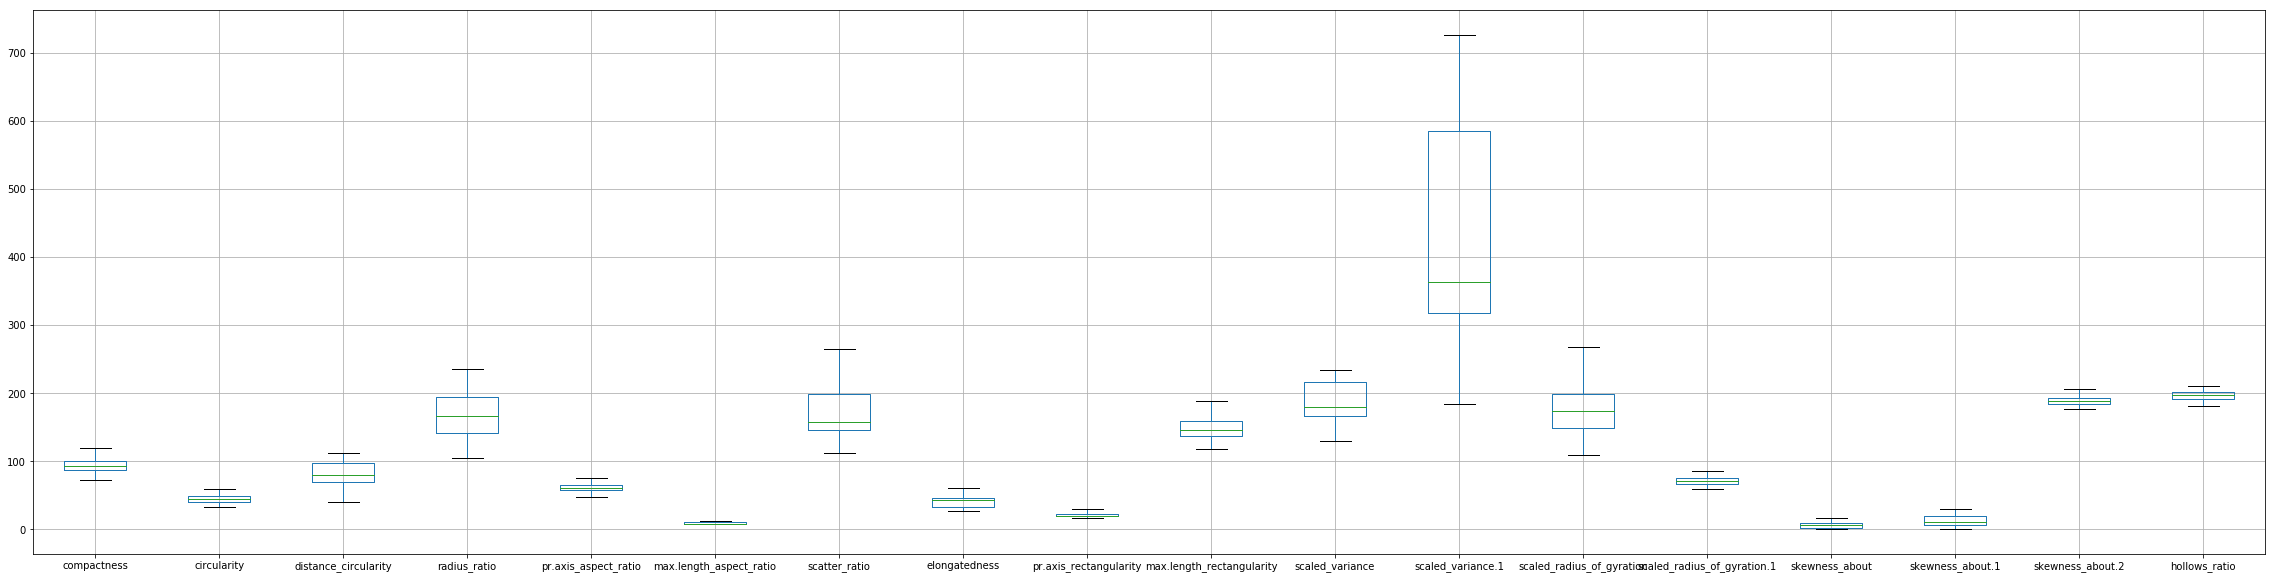

In [254]:
vehicle_df.boxplot(figsize=(40,10))

Cleared all the outliers, now the data looks fine.

# 2. Understanding the attributes

Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

Univariate analysis
----

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000171F7204978>,
      dtype=object)

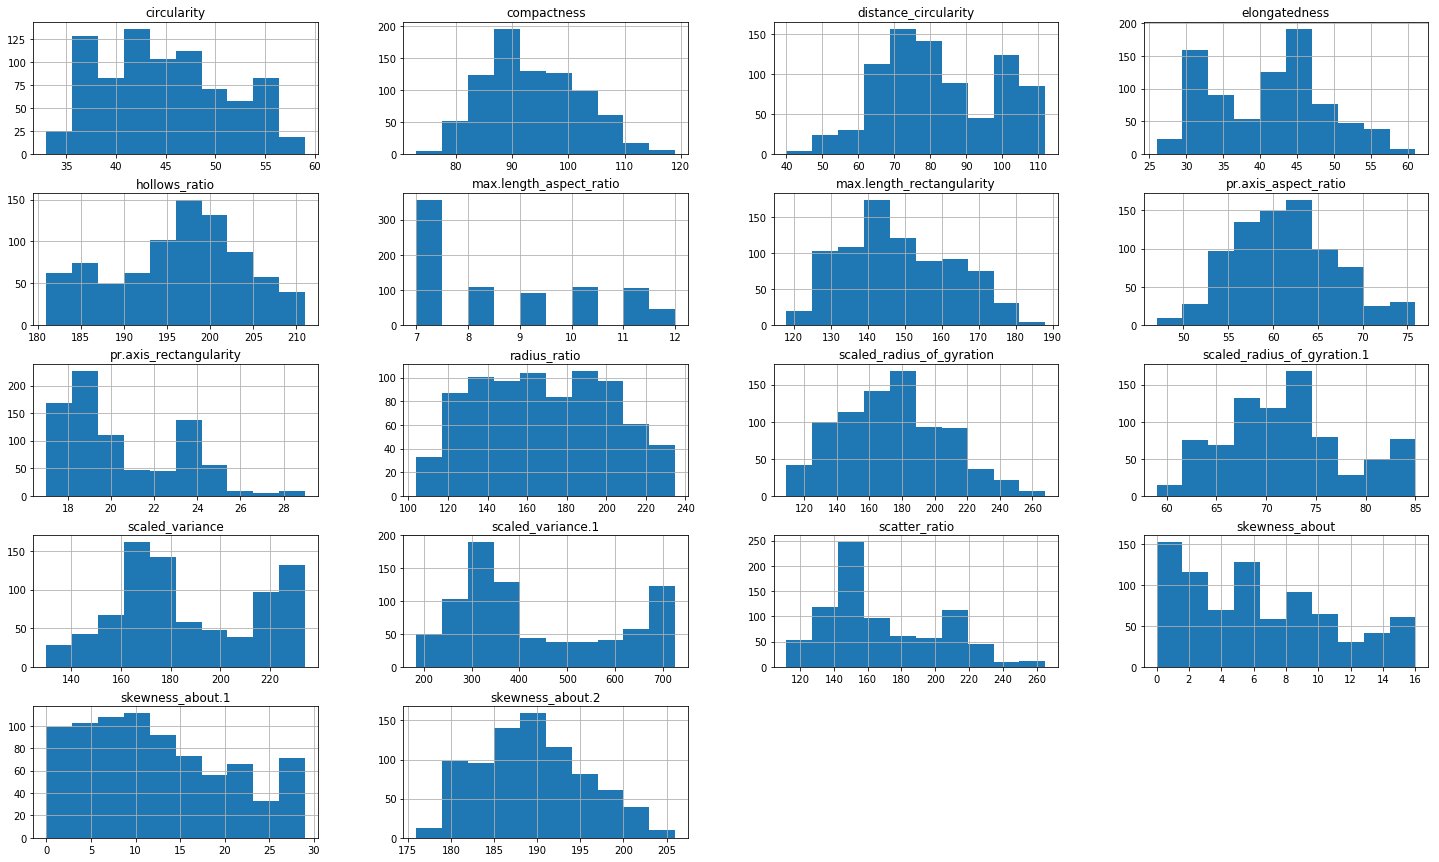

In [255]:
vehicle_df.hist(figsize=(25,15))

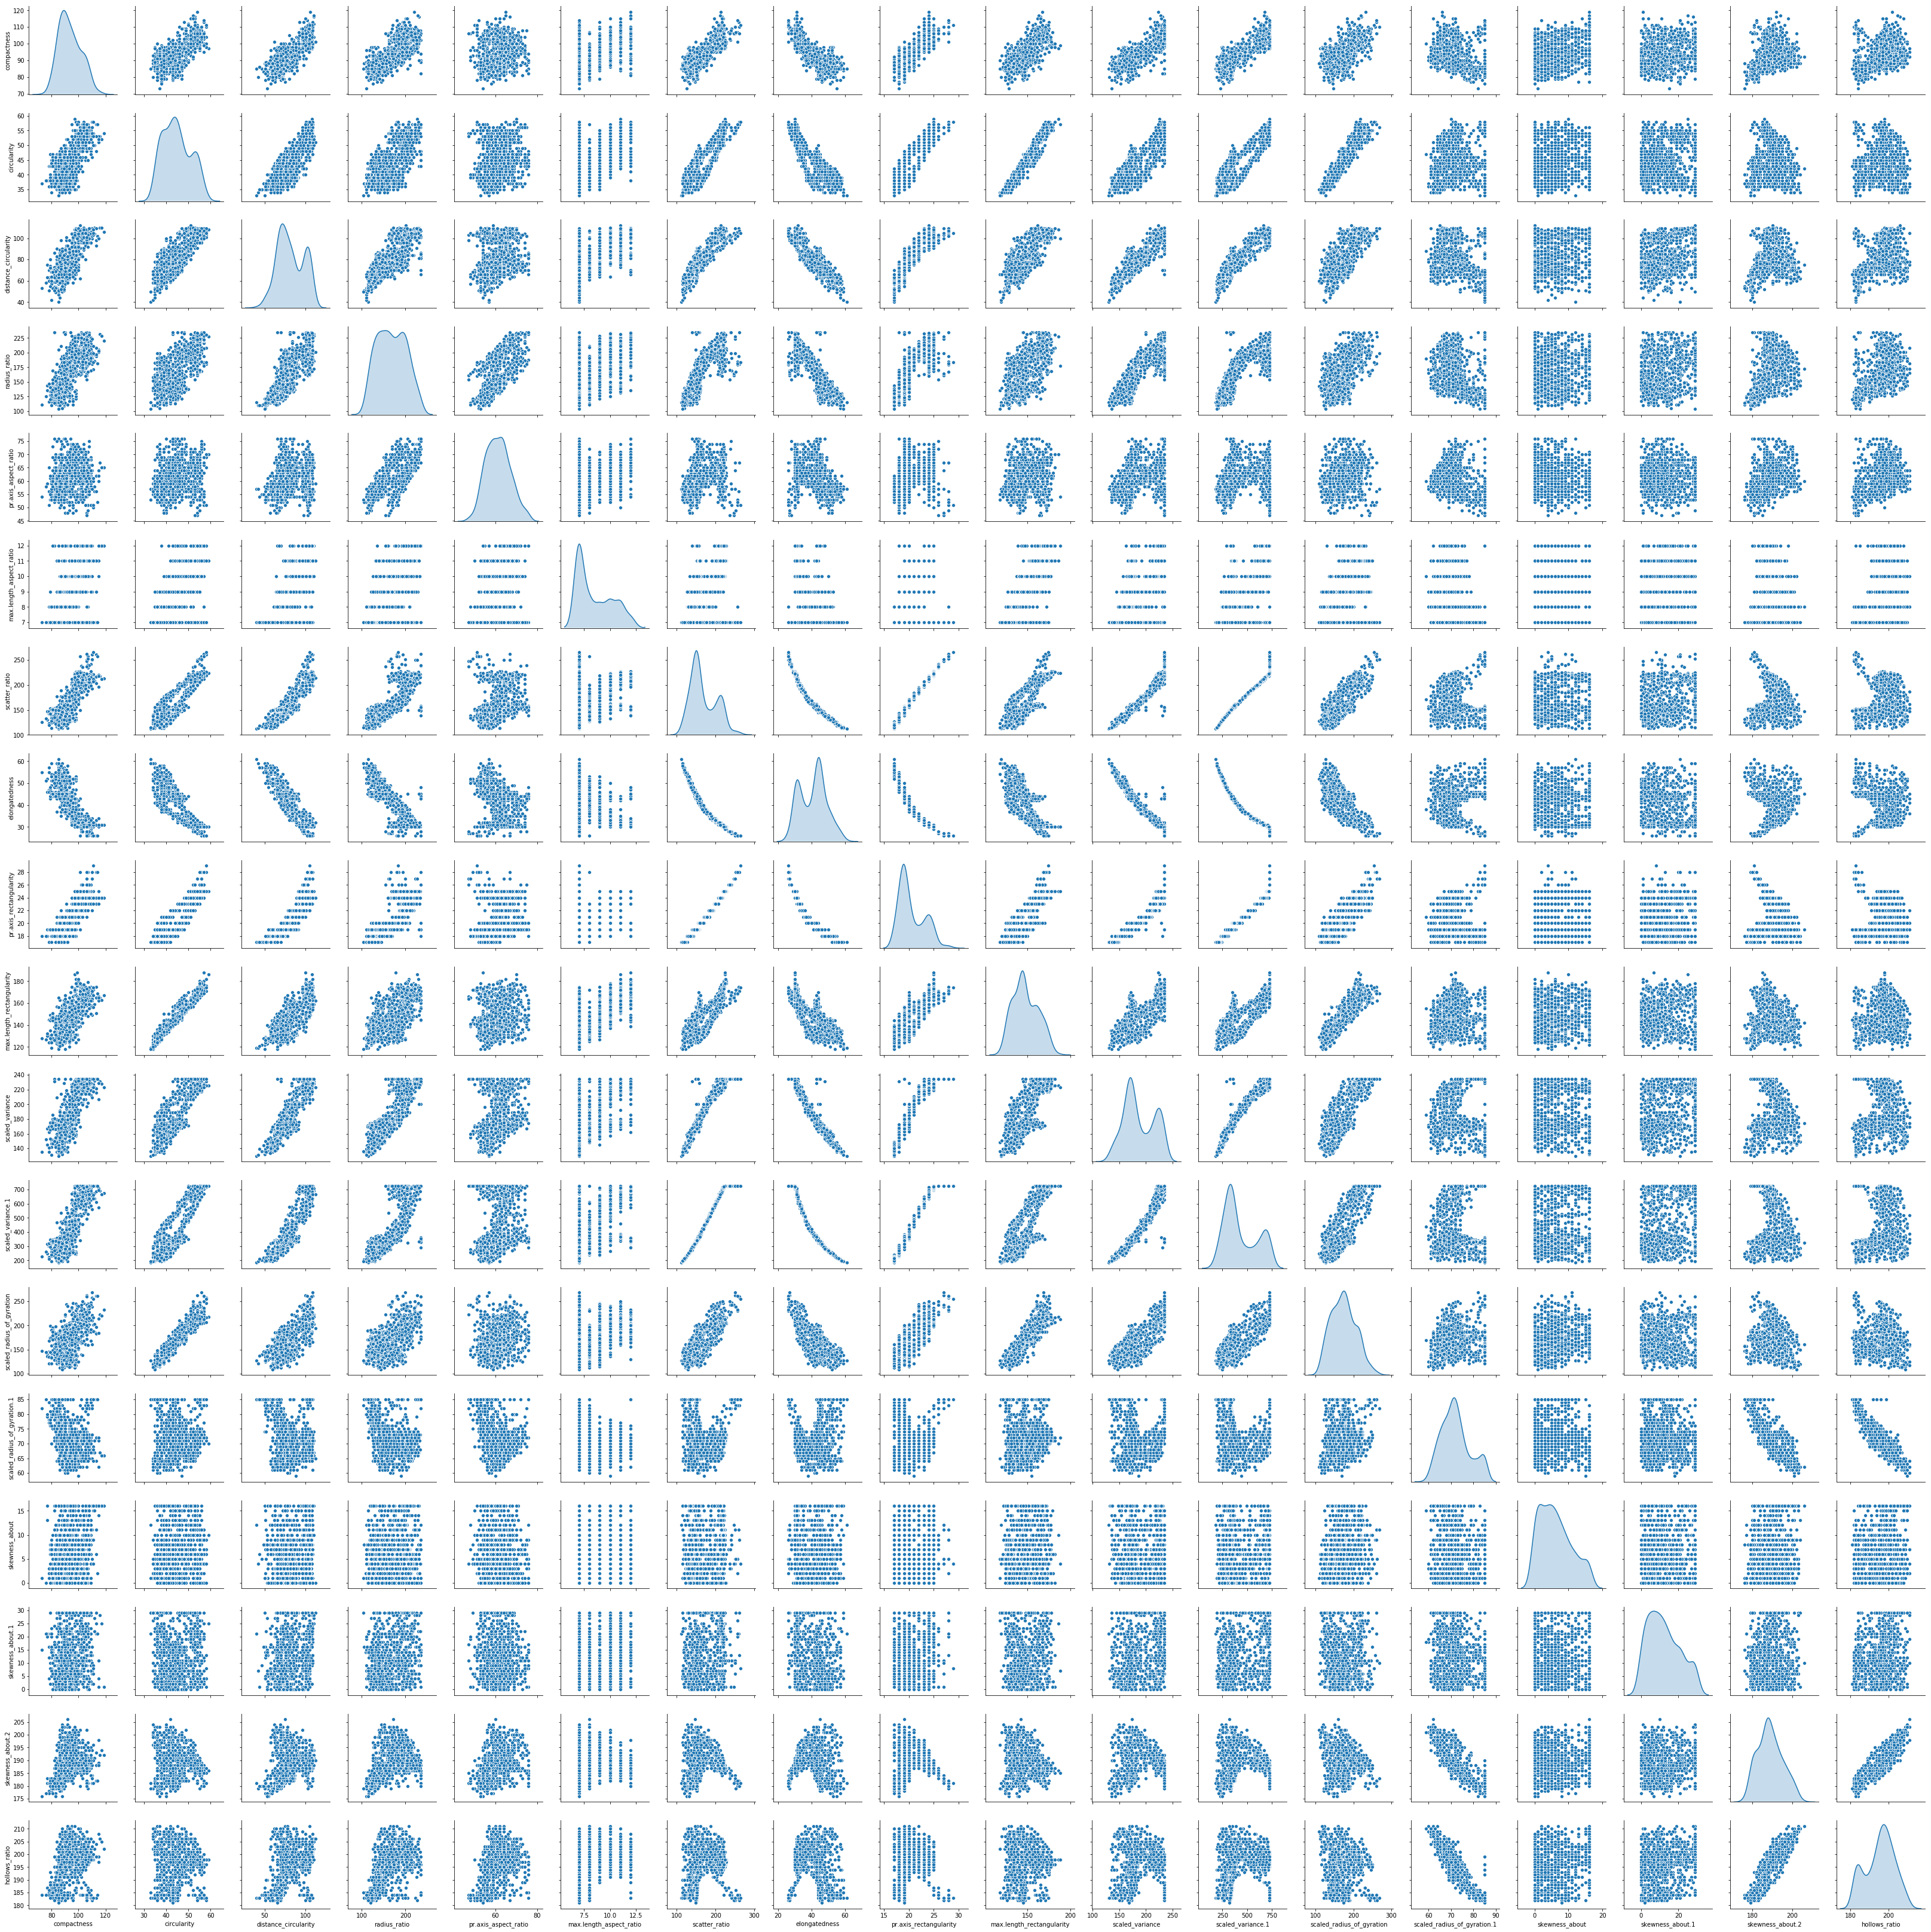

In [256]:
sns.pairplot(vehicle_df, diag_kind='kde') 

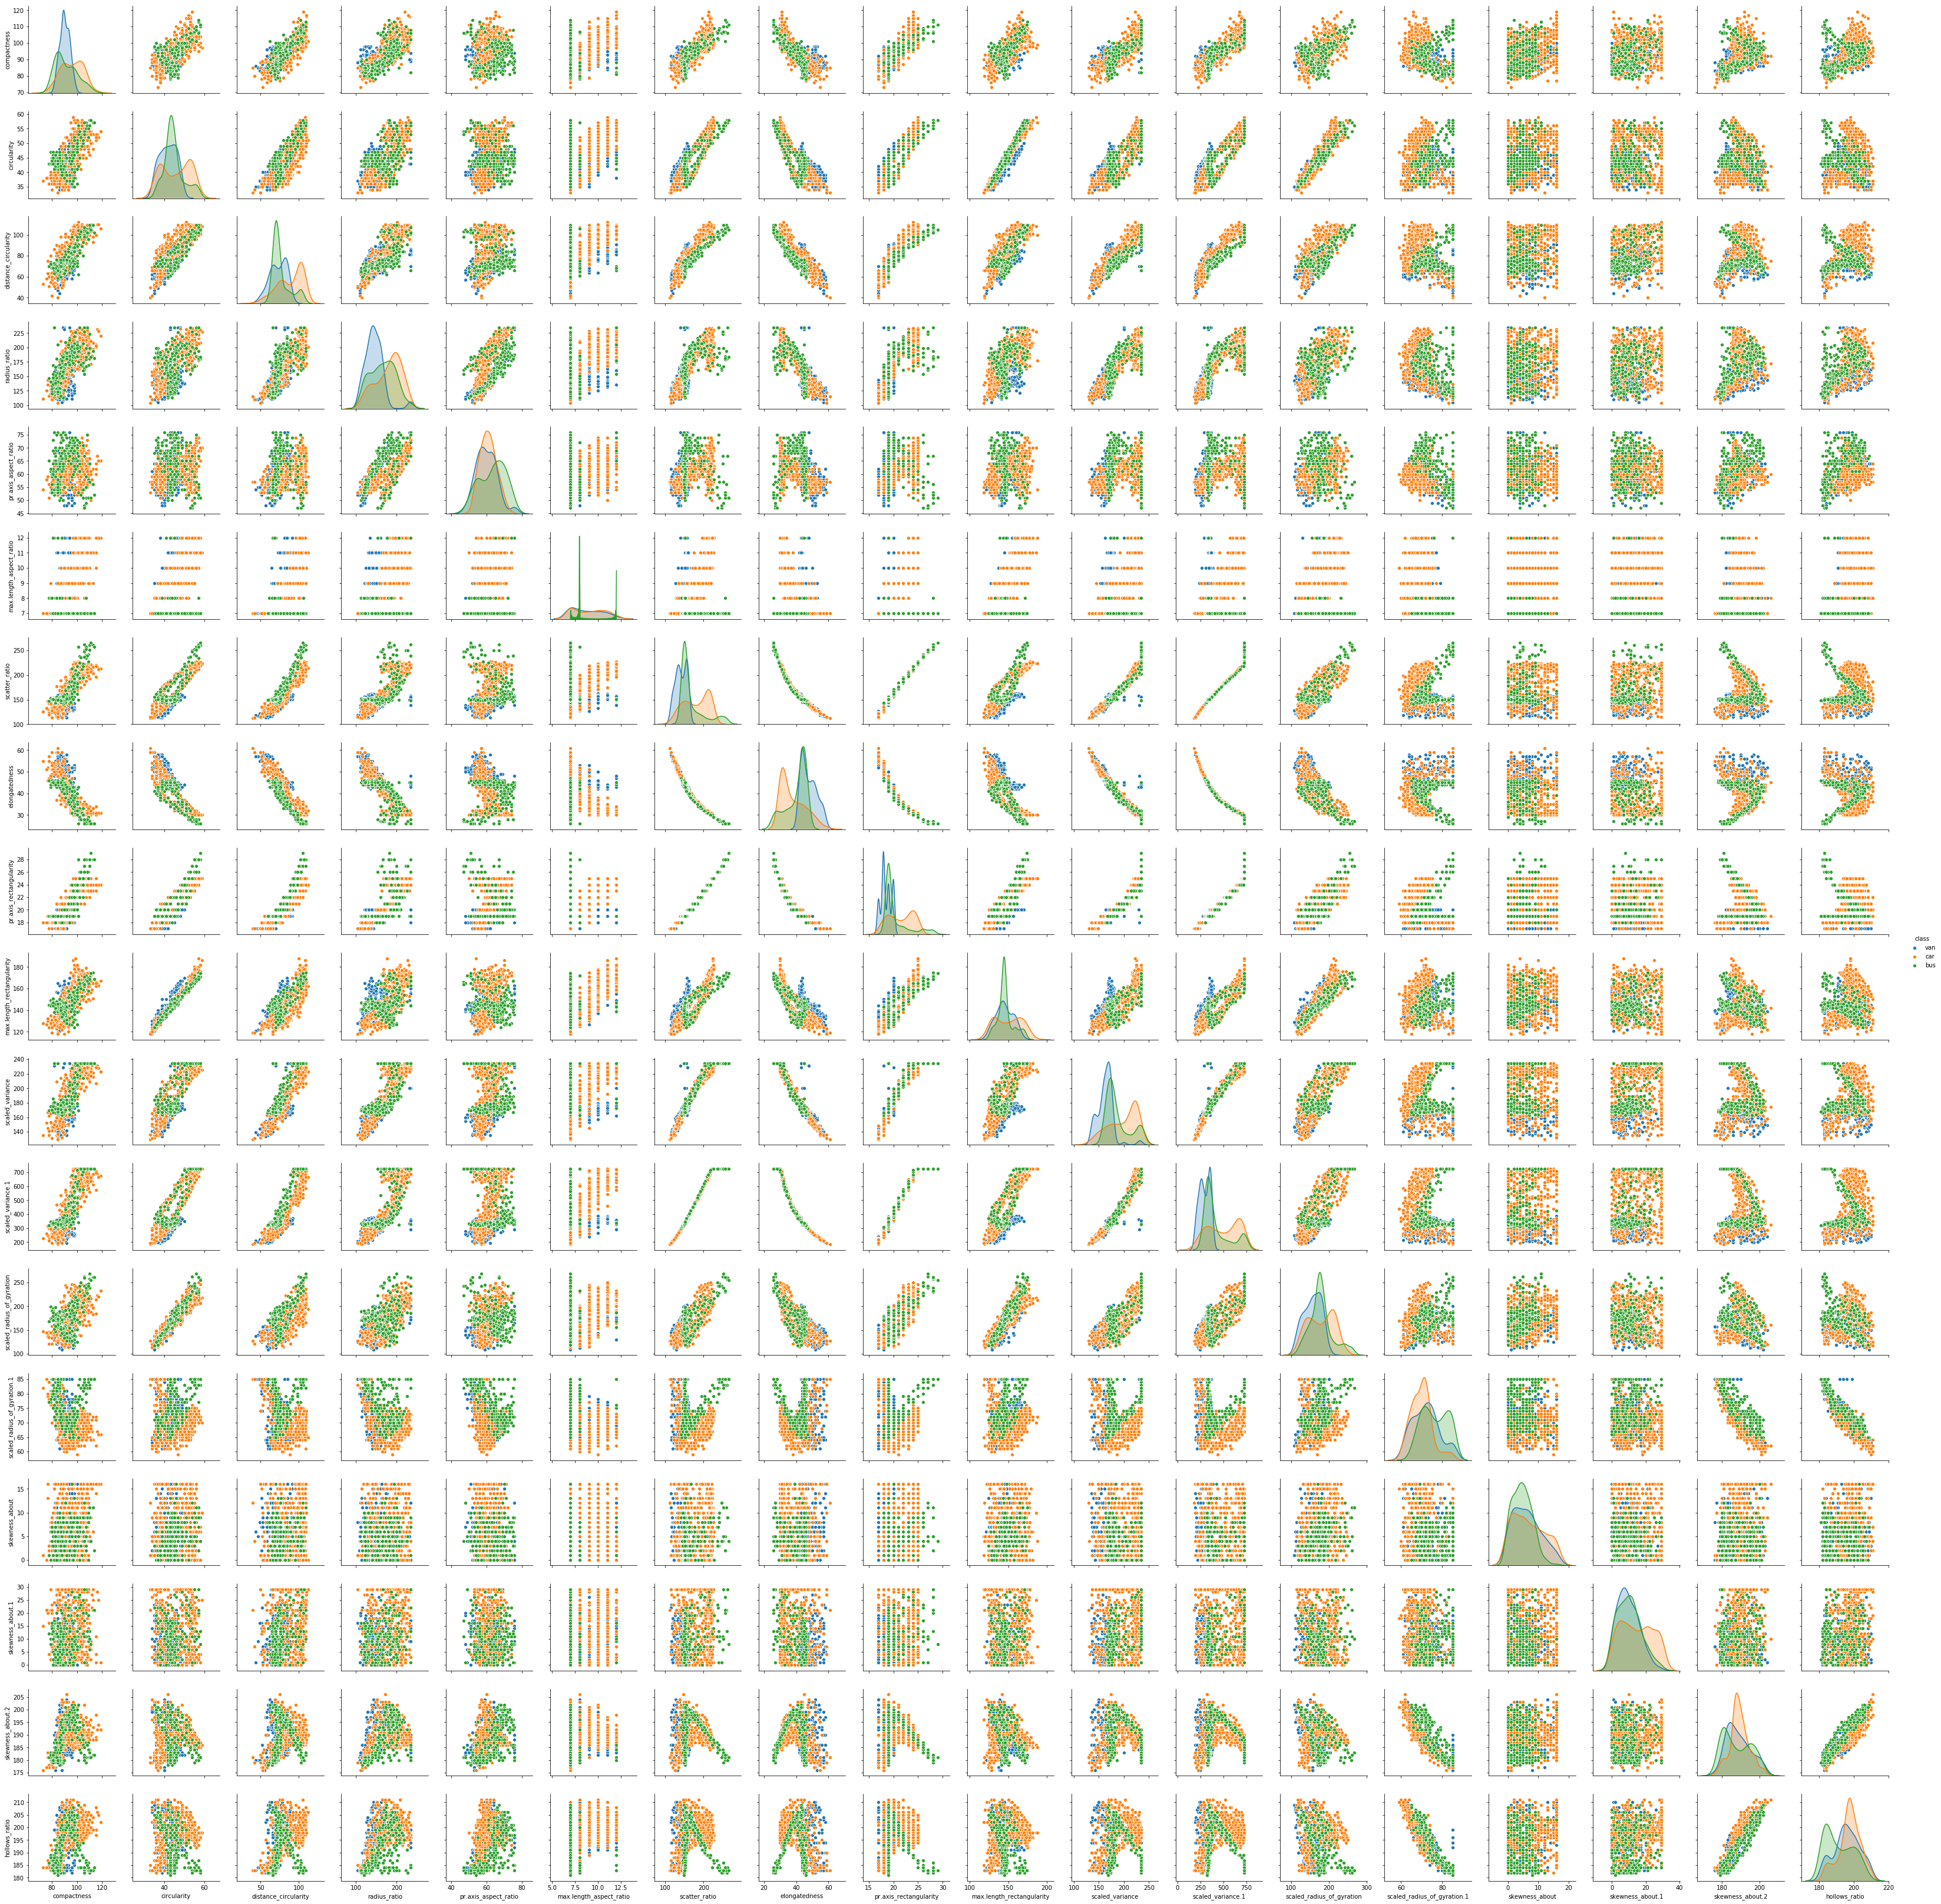

In [257]:
sns.pairplot(vehicle_df, diag_kind='kde', hue = 'class') 

# 3. PCA

Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [258]:
# Drop class variables
vehicle_df_new = vehicle_df.drop(['class'], axis =1)

vehicle_df_new.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                 72.00                     10.0          162.0   
1                 57.00                      9.0          149.0   
2                 66.00                     10.0          207.0   
3                 63.00                      9.0          144.0   
4                 75.88                     12.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            234.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                         85.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

In [260]:
X = vehicle_df.drop(['class'], axis =1)
y = vehicle_df["class"]

In [261]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [262]:
from scipy.stats import zscore
X_new=X_train.apply(zscore)
X_new.head()

compactness  circularity  distance_circularity  radius_ratio  \
730     0.934918     1.685362              1.599486      0.985691   
175    -0.640028    -0.739957             -0.213104      0.560286   
624    -1.124627    -1.386708             -0.400613     -0.959020   
236     0.329170    -1.225020             -0.463116      0.955305   
158    -0.761178    -0.901645             -0.463116     -0.472842   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
730             -0.054561                 1.510167       1.745413   
175              2.000517                -0.906950      -0.279430   
624             -1.082100                -0.906950      -0.823417   
236              2.171773                -0.906950      -0.067879   
158             -0.568331                -0.906950      -0.490980   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
730      -1.454752                1.767982                   2.096935   
175      -0.043298               -0.171821                  -0.908840   
624       0.854901               -0.947742                  -1.523657   
236      -0.299926               -0.171821                  -1.318718   
158       0.341645               -0.559781                  -0.772214   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
730         1.479678           1.847776                   0.945973   
175        -0.034407          -0.288892                  -0.788248   
624        -0.703421          -0.836282                  -1.097930   
236         0.071227          -0.042874                  -1.159866   
158        -0.421731          -0.547211                  -1.035993   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
730                     0.271894        0.345775          1.970035   
175                     0.118109       -1.161034         -0.158575   
624                    -0.189461       -0.515258          1.970035   
236                    -0.035676       -1.161034         -1.104625   
158                    -0.343246       -1.161034          1.970035   

     skewness_about.2  hollows_ratio  
730         -0.289534       0.712118  
175          0.661833       0.191134  
624          0.027588      -0.069358  
236          1.137516       0.581872  
158         -0.289534       0.060888

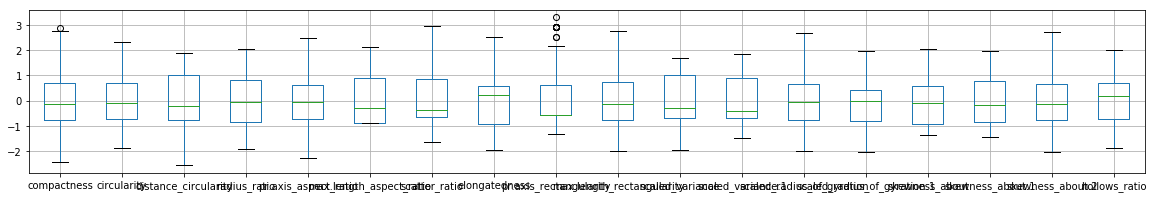

In [263]:
X_new.boxplot(figsize=(20,3))

Identify eigen values and eigen vector
---

In [264]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(X_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00176056e+00  6.89671827e-01  7.96018767e-01  7.31230604e-01
   2.03934624e-01  5.42663879e-01  8.12121807e-01 -7.88682340e-01
   8.12485541e-01  6.77417783e-01  7.72241612e-01  8.24866862e-01
   5.86316815e-01 -3.04897513e-01  2.52870549e-01  1.63296858e-01
   3.24197018e-01  4.06989901e-01]
 [ 6.89671827e-01  1.00176056e+00  8.02424623e-01  6.49480485e-01
   2.17091468e-01  6.15076801e-01  8.62565288e-01 -8.28327387e-01
   8.57849722e-01  9.70658297e-01  8.20452369e-01  8.59933700e-01
   9.40375356e-01  3.50173700e-02  1.77202134e-01 -1.67584995e-02
  -9.75816059e-02  7.35712759e-02]
 [ 7.96018767e-01  8.02424623e-01  1.00176056e+00  8.14309220e-01
   2.75322918e-01  6.76077104e-01  9.10327865e-01 -9.17383848e-01
   8.96853555e-01  7.79761702e-01  9.00691700e-01  9.16977662e-01
   7.13215610e-01 -2.92795727e-01  1.45232591e-01  2.61490174e-01
   1.77649276e-01  3.77871057e-01]
 [ 7.31230604e-01  6.49480485e-01  8.14309220e-01  1.00176056e+00
   6.91836679e-

In [265]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.68677904e-01  8.57621620e-02 -1.87628041e-01 -1.88693353e-02
   2.86217638e-02  2.40089103e-01 -3.45897434e-01  7.22020416e-01
  -2.92282039e-01 -2.43034507e-01  4.93997199e-02  4.99974646e-02
   1.44812868e-01 -1.17457187e-01  5.90533255e-03 -1.97898538e-02
   2.66892792e-02  1.16522995e-02]
 [-2.83414933e-01 -1.58305311e-01 -3.63482022e-02  2.02740538e-01
   7.08794714e-02 -6.66797149e-02  3.70322855e-01  1.18166787e-01
  -6.24277618e-02  8.77255496e-02  4.90319094e-02 -1.69760177e-01
  -6.05924537e-02 -1.03173393e-01  1.87550169e-02 -4.67085473e-01
  -1.95039053e-01 -6.14756324e-01]
 [-2.99471779e-01  3.89074639e-02 -5.25261248e-02 -9.73810204e-02
   8.59573726e-02 -2.90331520e-02 -4.71099860e-02 -3.44784737e-01
  -3.27454332e-01 -2.02116318e-01  6.58945955e-01  3.23746337e-01
  -2.24818722e-01  1.34599648e-01  2.36650814e-02  5.71260549e-02
  -8.12783307e-02 -3.23175787e-02]
 [-2.73393560e-01  1.83362931e-01  2.44102784e-01  1.48339310e-02
  -2.36630405e-01 -

In [266]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 55.6280895   73.67837656  80.22921728  86.52689069  90.77922887
  94.62381597  96.46771431  97.68982133  98.31067067  98.8380549
  99.17663315  99.4642761   99.63974069  99.78116524  99.86199844
  99.93402791  99.98442287 100.        ]


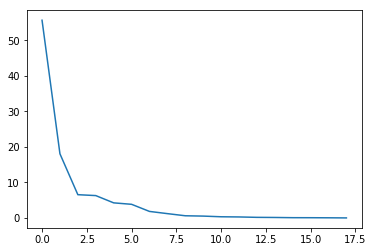

In [267]:
plt.plot(var_exp)

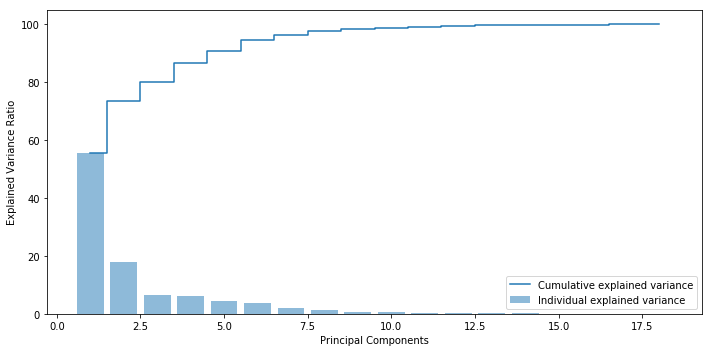

In [268]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Visually we can observe that their is steep drop in variance explained with increase in number of PC's.

We will proceed with 9 components here. But depending on requirement 95% variation or 6 to 9 components will also do good

In [269]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 9 PCA dimensions

pca = PCA(n_components=9)
data_reduced = pca.fit_transform(X_train)
data_reduced.transpose()

array([[ 314.07775401,  -48.25316339, -148.69709174, ..., -238.3477925 ,
         -72.57540739, -111.30069627],
       [  -2.18239372,   33.09728012,    8.27375312, ...,   -6.25583456,
           0.62199059,  -43.07168827],
       [ -24.21726479,    6.59922583,  -19.29205654, ...,  -19.44099417,
         -10.72374383,    2.85355945],
       ...,
       [  13.39081903,    1.76022023,   -4.87359663, ...,    2.95694334,
          -1.93654181,    0.5382645 ],
       [   2.86535417,   -5.10009722,   -3.89708398, ...,   -0.68403503,
          -7.01448082,   -1.67735708],
       [  -4.02148304,    1.12105236,   -3.99329327, ...,   -1.88613331,
          -1.84386955,   -3.32759719]])

In [270]:
df_comp = pd.DataFrame(pca.components_,columns=list(X_train))
df_comp.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.039177     0.030865              0.084754      0.155188   
1     0.053300    -0.085901              0.072114      0.619876   
2    -0.002942     0.089154              0.065337      0.614027   
3    -0.212446    -0.093687             -0.240797      0.150174   
4    -0.014803    -0.014106              0.396549     -0.076696   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.009080                 0.005649       0.188749   
1              0.129714                 0.003517      -0.064032   
2              0.189404                 0.011498      -0.039420   
3              0.094865                -0.044936       0.092671   
4             -0.128237                 0.024790       0.126511   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.043622                0.014561                   0.069550   
1      -0.018629               -0.007711                  -0.197640   
2      -0.025347               -0.007145                   0.168167   
3      -0.026684                0.002854                  -0.353043   
4      -0.019324                0.011339                  -0.007976   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.157071           0.936339                   0.148084   
1         0.076880          -0.000286                  -0.633694   
2         0.182726          -0.250707                   0.646779   
3         0.473939          -0.050457                  -0.053266   
4         0.182404          -0.110620                   0.141205   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.003723        0.003100          0.010122   
1                    -0.183450       -0.023819          0.100170   
2                    -0.040723        0.020549         -0.131724   
3                     0.412210       -0.139412          0.114942   
4                    -0.068628        0.072396          0.846342   

   skewness_about.2  hollows_ratio  
0          0.002302       0.009559  
1          0.193905       0.224935  
2          0.066481       0.076121  
3         -0.301576      -0.443930  
4         -0.012644       0.104723

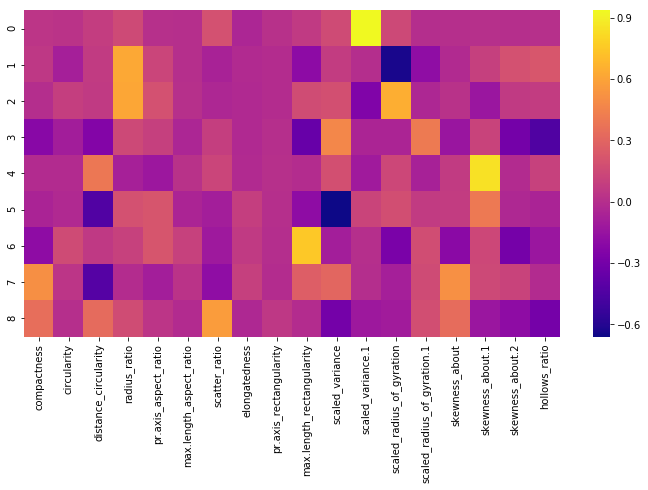

In [271]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [272]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [273]:
pca.components_

array([[ 3.91767589e-02,  3.08651271e-02,  8.47544495e-02,
         1.55188389e-01,  9.07954664e-03,  5.64868418e-03,
         1.88749031e-01, -4.36218315e-02,  1.45607190e-02,
         6.95501569e-02,  1.57070883e-01,  9.36338868e-01,
         1.48083735e-01, -3.72256020e-03,  3.10023082e-03,
         1.01215323e-02,  2.30229782e-03,  9.55938835e-03],
       [ 5.32995513e-02, -8.59010640e-02,  7.21138817e-02,
         6.19875677e-01,  1.29713574e-01,  3.51671625e-03,
        -6.40323421e-02, -1.86288154e-02, -7.71061001e-03,
        -1.97640114e-01,  7.68796012e-02, -2.85881446e-04,
        -6.33693529e-01, -1.83449526e-01, -2.38191984e-02,
         1.00169684e-01,  1.93904750e-01,  2.24934510e-01],
       [-2.94237354e-03,  8.91543570e-02,  6.53370454e-02,
         6.14026509e-01,  1.89403687e-01,  1.14982886e-02,
        -3.94204989e-02, -2.53471473e-02, -7.14454338e-03,
         1.68167437e-01,  1.82726487e-01, -2.50707169e-01,
         6.46778605e-01, -4.07232299e-02,  2.05490570e

In [274]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

Feature       PC1       PC2
0                compactness  0.039177  0.053300
1                circularity  0.030865 -0.085901
2       distance_circularity  0.084754  0.072114
3               radius_ratio  0.155188  0.619876
4       pr.axis_aspect_ratio  0.009080  0.129714
5    max.length_aspect_ratio  0.005649  0.003517
6              scatter_ratio  0.188749 -0.064032
7              elongatedness -0.043622 -0.018629
8     pr.axis_rectangularity  0.014561 -0.007711
9  max.length_rectangularity  0.069550 -0.197640

In [275]:
pca.explained_variance_ratio_

array([9.60068722e-01, 1.82724526e-02, 1.11140061e-02, 3.19469901e-03,
       2.05963218e-03, 1.39502558e-03, 1.10625919e-03, 7.37488294e-04,
       6.68753843e-04])

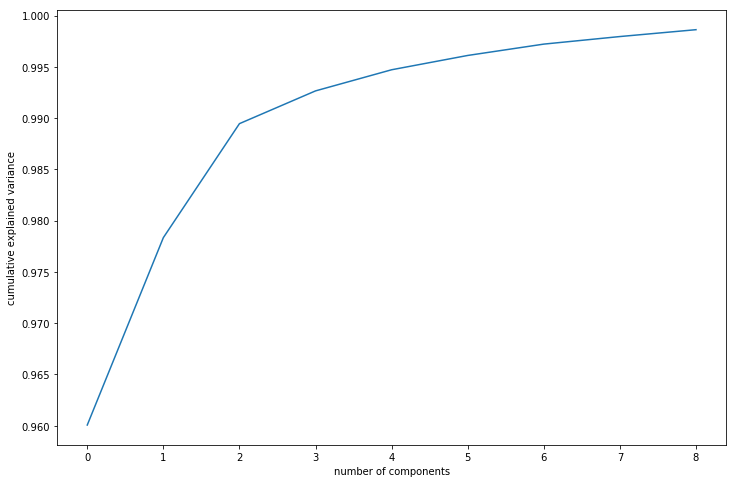

In [276]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like 9 components are enough to describe 95% of the variance in the dataset
We'll choose 9 components for our modeling

In [277]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=9)

In [278]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(569, 9)

In [279]:
df_train_pca

array([[ 314.07775506,    2.18175032,  -24.21561905, ...,   13.38930409,
           2.67329035,   -3.9037265 ],
       [ -48.25316352,  -33.09721365,    6.59936447, ...,    1.73286158,
          -5.16691418,    1.31229081],
       [-148.6970926 ,   -8.27343098,  -19.2932134 , ...,   -4.86301759,
          -3.89720162,   -4.10019572],
       ...,
       [-238.34779141,    6.25597267,  -19.44138153, ...,    2.92686469,
          -0.5325326 ,   -2.16887245],
       [ -72.57540777,   -0.62153189,  -10.7254179 , ...,   -1.91628596,
          -6.91369823,   -2.04128061],
       [-111.30069401,   43.07118295,    2.85394513, ...,    0.38309285,
          -1.69489743,   -3.08687497]])

In [280]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

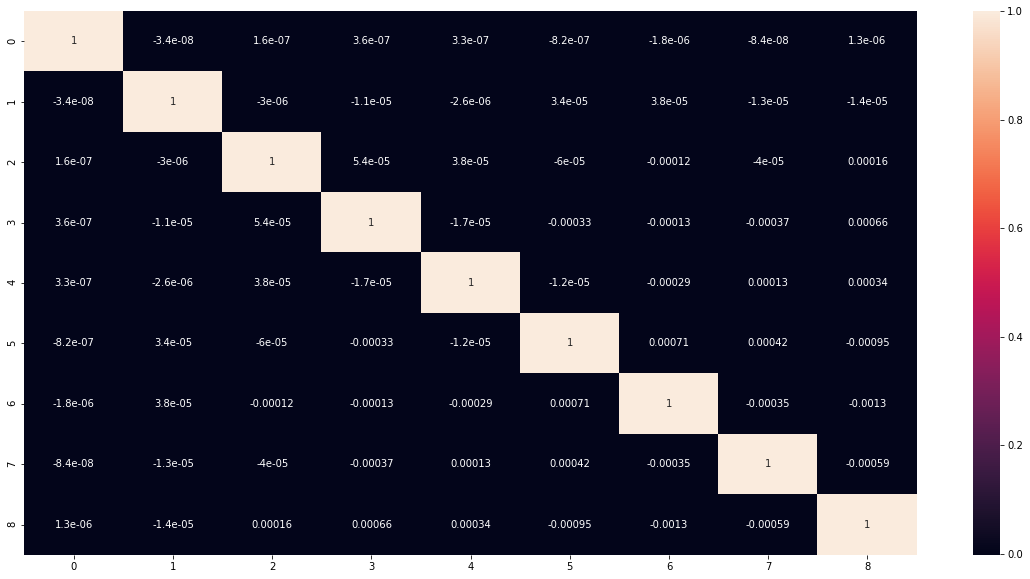

In [281]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [282]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0007097789682491082 , min corr:  -0.0013397560650001874


#### Indeed - there is no correlation between any two components.
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [283]:
#Applying selected components to the test data - 9 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(244, 9)

# 4. Model Building

Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

### Linear SVM
Let's first try building a linear SVM model (i.e. a linear kernel). 

In [284]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [285]:
# predict
predictions = svm_linear.predict(X_test)
predictions[:10]

array(['bus', 'car', 'car', 'bus', 'bus', 'car', 'car', 'van', 'bus',
       'car'], dtype=object)

In [286]:
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i 
# but predicted to be in class j
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

array([[ 57,   3,   0],
       [  4, 117,   0],
       [  0,   7,  56]], dtype=int64)

In [287]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.9426229508196722

In [288]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

         bus       0.93      0.95      0.94        60
         car       0.92      0.97      0.94       121
         van       1.00      0.89      0.94        63

   micro avg       0.94      0.94      0.94       244
   macro avg       0.95      0.94      0.94       244
weighted avg       0.94      0.94      0.94       244



### Non-Linear SVM

Let's now try a non-linear model with the RBF kernel.

In [289]:
# rbf kernel with other hyperparameters kept to default 
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [290]:
# predict
predictions = svm_rbf.predict(X_test)

# accuracy 
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.4959016393442623


The accuracy achieved with a non-linear kernel is very low compare to linear one.

### Grid Search Cross-Validation


In [291]:
# conduct (grid search) cross-validation to find the optimal values 
# of cost C and the choice of kernel

from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.01, 0.05, 0.5, 1], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = svm.SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')

# fit
clf.fit(X_train, y_train)



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [292]:
# results
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        0.027278         0.008692         0.513181          0.513181    0.01   
1        0.010668         0.002671         0.513181          0.513181    0.01   
2        0.008339         0.003673         0.513181          0.513181    0.01   
3        0.012055         0.008718         0.513181          0.513181    0.05   
4        0.014493         0.001335         0.562390          0.570324    0.05   
5        0.009193         0.002338         0.576450          0.582614    0.05   
6        0.015870         0.004999         0.550088          0.596649     0.5   
7        0.010681         0.002670         0.840070          0.913000     0.5   
8        0.003507         0.002171         0.785589          0.832164     0.5   
9        0.019875         0.004054         0.585237          1.000000       1   
10       0.009683         0.000333         0.885764          0.972747       1   
11       0.005340         0.002669         0.847100          0.876093       1   

   param_gamma                        params  rank_test_score  \
0         0.01    {'C': 0.01, 'gamma': 0.01}                9   
1        0.001   {'C': 0.01, 'gamma': 0.001}                9   
2       0.0001  {'C': 0.01, 'gamma': 0.0001}                9   
3         0.01    {'C': 0.05, 'gamma': 0.01}                9   
4        0.001   {'C': 0.05, 'gamma': 0.001}                7   
5       0.0001  {'C': 0.05, 'gamma': 0.0001}                6   
6         0.01     {'C': 0.5, 'gamma': 0.01}                8   
7        0.001    {'C': 0.5, 'gamma': 0.001}                3   
8       0.0001   {'C': 0.5, 'gamma': 0.0001}                4   
9         0.01       {'C': 1, 'gamma': 0.01}                5   
10       0.001      {'C': 1, 'gamma': 0.001}                1   
11      0.0001     {'C': 1, 'gamma': 0.0001}                2   

    split0_test_score  split0_train_score  split1_test_score  \
0            0.513089            0.513228           0.513228   
1            0.513089            0.513228           0.513228   
2            0.513089            0.513228           0.513228   
3            0.513089            0.513228           0.513228   
4            0.570681            0.584656           0.566138   
5            0.586387            0.589947           0.613757   
6            0.544503            0.589947           0.539683   
7            0.874346            0.910053           0.820106   
8            0.842932            0.833333           0.772487   
9            0.586387            1.000000           0.576720   
10           0.926702            0.965608           0.857143   
11           0.874346            0.873016           0.830688   

    split1_train_score  split2_test_score  split2_train_score  std_fit_time  \
0             0.513158           0.513228            0.513158      0.009681   
1             0.513158           0.513228            0.513158      0.001880   
2             0.513158           0.513228            0.513158      0.000465   
3             0.513158           0.513228            0.513158      0.005610   
4             0.578947           0.550265            0.547368      0.004894   
5             0.613158           0.529101            0.544737      0.002083   
6             0.610526           0.566138            0.589474      0.000239   
7             0.926316           0.825397            0.902632      0.001889   
8             0.828947           0.740741            0.834211      0.002683   
9             1.000000           0.592593            1.000000      0.003412   
10            0.981579           0.873016            0.971053      0.001699   
11            0.868421           0.835979            0.886842      0.001888   

    std_score_time  std_test_score  std_train_score  
0         0.004105        0.000065         0.000033  
1         0.001889        0.000065         0.000033  
2         0.000470        0.000065         0.000033  
3         0.006663        0

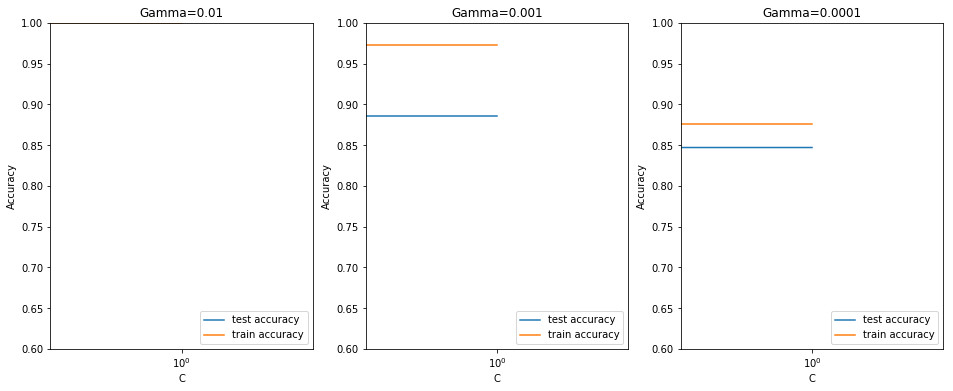

In [293]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

In [294]:
# optimal hyperparameters
best_C = 1
best_gamma = 0.001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [295]:
# predict
predictions = svm_final.predict(X_test)

In [296]:
# evaluation: CM 
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy, "\n")
print(confusion)

0.8770491803278688 

[[ 41  18   1]
 [  4 116   1]
 [  2   4  57]]


# Model PCA dataset

### Linear SVM
Let's first try building a linear SVM model (i.e. a linear kernel). 

In [297]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(df_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [298]:
# predict
predictions = svm_linear.predict(df_test_pca)
predictions[:10]

array(['bus', 'car', 'car', 'car', 'bus', 'car', 'car', 'van', 'bus',
       'car'], dtype=object)

In [299]:
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i 
# but predicted to be in class j
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

array([[ 30,  28,   2],
       [ 17, 103,   1],
       [  4,   2,  57]], dtype=int64)

In [300]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.7786885245901639

In [301]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

         bus       0.59      0.50      0.54        60
         car       0.77      0.85      0.81       121
         van       0.95      0.90      0.93        63

   micro avg       0.78      0.78      0.78       244
   macro avg       0.77      0.75      0.76       244
weighted avg       0.77      0.78      0.77       244



### Non-Linear SVM

Let's now try a non-linear model with the RBF kernel.

In [302]:
# rbf kernel with other hyperparameters kept to default 
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(df_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [303]:
# predict
predictions = svm_rbf.predict(df_test_pca)

# accuracy 
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.4959016393442623


The accuracy achieved with a non-linear kernel is very low compare to linear one.

### Grid Search Cross-Validation


In [304]:
# conduct (grid search) cross-validation to find the optimal values 
# of cost C and the choice of kernel

from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.01, 0.05, 0.5, 1], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = svm.SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')

# fit
clf.fit(df_train_pca, y_train)



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [305]:
# results
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        0.015138         0.005187         0.513181          0.513181    0.01   
1        0.005339         0.004006         0.513181          0.513181    0.01   
2        0.004005         0.004007         0.513181          0.513181    0.01   
3        0.013357         0.002171         0.513181          0.513181    0.05   
4        0.006515         0.003337         0.569420          0.572083    0.05   
5        0.004868         0.002669         0.574692          0.581741    0.05   
6        0.013007         0.002672         0.564148          0.621248     0.5   
7        0.005833         0.002713         0.831283          0.900692     0.5   
8        0.008062         0.001335         0.782074          0.816360     0.5   
9        0.012364         0.005009         0.606327          1.000000       1   
10       0.006677         0.001334         0.852373          0.959566       1   
11       0.005154         0.002480         0.831283          0.862035       1   

   param_gamma                        params  rank_test_score  \
0         0.01    {'C': 0.01, 'gamma': 0.01}                9   
1        0.001   {'C': 0.01, 'gamma': 0.001}                9   
2       0.0001  {'C': 0.01, 'gamma': 0.0001}                9   
3         0.01    {'C': 0.05, 'gamma': 0.01}                9   
4        0.001   {'C': 0.05, 'gamma': 0.001}                7   
5       0.0001  {'C': 0.05, 'gamma': 0.0001}                6   
6         0.01     {'C': 0.5, 'gamma': 0.01}                8   
7        0.001    {'C': 0.5, 'gamma': 0.001}                2   
8       0.0001   {'C': 0.5, 'gamma': 0.0001}                4   
9         0.01       {'C': 1, 'gamma': 0.01}                5   
10       0.001      {'C': 1, 'gamma': 0.001}                1   
11      0.0001     {'C': 1, 'gamma': 0.0001}                2   

    split0_test_score  split0_train_score  split1_test_score  \
0            0.513089            0.513228           0.513228   
1            0.513089            0.513228           0.513228   
2            0.513089            0.513228           0.513228   
3            0.513089            0.513228           0.513228   
4            0.570681            0.587302           0.587302   
5            0.581152            0.592593           0.613757   
6            0.560209            0.611111           0.555556   
7            0.863874            0.894180           0.814815   
8            0.837696            0.825397           0.772487   
9            0.607330            1.000000           0.587302   
10           0.890052            0.952381           0.830688   
11           0.863874            0.859788           0.809524   

    split1_train_score  split2_test_score  split2_train_score  std_fit_time  \
0             0.513158           0.513228            0.513158      0.001094   
1             0.513158           0.513228            0.513158      0.001914   
2             0.513158           0.513228            0.513158      0.000001   
3             0.513158           0.513228            0.513158      0.001885   
4             0.578947           0.550265            0.550000      0.001811   
5             0.613158           0.529101            0.539474      0.001192   
6             0.647368           0.576720            0.605263      0.001402   
7             0.915789           0.814815            0.892105      0.001637   
8             0.821053           0.735450            0.802632      0.008701   
9             1.000000           0.624339            1.000000      0.000493   
10            0.976316           0.835979            0.950000      0.001887   
11            0.850000           0.820106            0.876316      0.000681   

    std_score_time  std_test_score  std_train_score  
0     2.007992e-03        0.000065         0.000033  
1     5.947204e-07        0.000065         0.000033  
2     2.491978e-05        0.000065         0.000033  
3     1.652310e-03        0

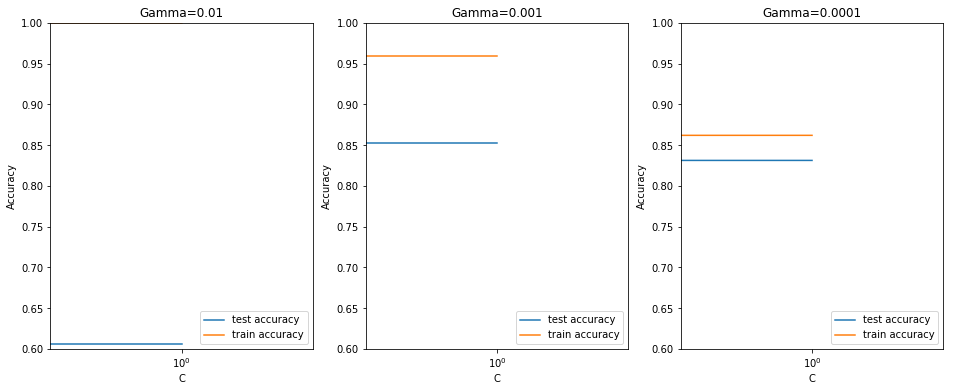

In [306]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

In [307]:
# optimal hyperparameters
best_C = 1
best_gamma = 0.001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(df_train_pca, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [308]:
# predict
predictions = svm_final.predict(df_test_pca)

In [309]:
# evaluation: CM 
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy, "\n")
print(confusion)

0.8442622950819673 

[[ 39  20   1]
 [  7 112   2]
 [  2   6  55]]


As part of the analysis we can see that in compare with PCA and orginal scaled dataset SVM results as follows

### Orginal Scaled Data:
    SVM Linear Model: 94%
    SVM Non-linear Model: 49%
    SVM Grid Search CV Method Kernal: 88%
    SVM Optimal parameter rbf : 87%
    
### PCA Data:
    SVM Linear Model: 77%
    SVM Non-linear Model: 49%
    SVM Grid Search CV Method Kernal: 86%
    SVM Optimal parameter rbf : 84%
    
In this test we can consider for Grid Search CV linear (C values -1 and gamma 0.001 and kernel = linear, rbf) will be the best model.